# Problem Statement



Given a WEIGHTED graph, return its diameter (the length of a largest shortest path) as
well as all instances of shortest path attaining that diameter. So the input
is a graph, from the structure used in class (nothing else), and the output is
a pair: one integer indicating the diameter and a list of list of nodes, each
representing a shortest path of diameter length
- Test not only on small graphs, but on large random graphs

## General Idea

Done on every node,run Dijkstra's algorithm to find the shortest paths and return the largest of those.


all nodes are labeled from 0 to n and all weights are positive meaning no negative cycles

## Code 

In [1]:
# graph functions from slides
def newgraph(v=None):
    return {v:{}} if v is not None else {}

def nodes(G):
    return list(G)

def nodecount(G):
    return len(G)

def addarc(G,e):
    (u,v,w) = e
    H=G.get(u,None)
    if H is None:
        G[u]={v:w}
    else:
        G[u][v]=w
    H=G.get(v,None)
    if H is None:
        G[v]={}

def addedge(G,e): 
    (u,v,w) = e
    addarc(G,(u,v,w))
    addarc(G,(v,u,w))

def neighbors(G,u): 
    a=[]
    for v,w in G[u].items():
        a.append((v,w))
    return a

def arcs(G): # A list of triples (u,v,w)
    all=[]
    for u in G.keys():
        for v,w in neighbors(G,u):
            all.append((u,v,w))
    return all

def edges(G): # A list of triples (u,v,w)
    all=[]
    for u in G.keys():
        for v,w in neighbors(G,u):
            if u<v:
                all.append((u,v,w))
    return all

def nodeingraph_p(v,G): # True iff node is in the graph
    H = G.get(v,False)
    return H != False

def boundaryedge_p(u,v,G): # True iff u is in G and v is not
    H = nodeingraph_p(u,G)
    return H!=False and not nodeingraph_p(v,G)

In [2]:
# heap functions from slides
def weight(edge):
    return edge[2]

def newheap(n):
    return [0]*(n+1)

def insert(a,e):
    a[0] = a[0] + 1
    a[a[0]] = e
    heapfixup(a,a[0])

def heapfixup(a,i):
    while i > 1:
        p = i // 2
        if weight(a[p]) > weight(a[i]): 
            a[p],a[i] = a[i],a[p]
            i = p
        else:
            return

def extractsmallest(a):
    e,a[1],a[0] = a[1],a[a[0]],a[0]-1
    heapfixdown(a,1)
    return e

def heapfixdown(a,i):
    while 2*i <= a[0]:
        c = 2*i
        if c+1 <= a[0]:
            if weight(a[c+1]) < weight(a[c]):
                c = c+1
        if weight(a[i]) > weight(a[c]):
            a[i],a[c] = a[c],a[i]
            i = c
        else:
            return

In [3]:
# algorithm from slides

def get_path(p, v):
    # where p is a rooted tree structure
    path=[v]
    while p[v] is not None:
        path.insert(0,p[v])
        v = p[v]
    return path

def dijkstra(G,r):
    n = nodecount(G)
    d,p = [float('inf')]*n,[None]*n
    d[r]=0
    heap,T = newheap(n*n),newgraph(r)
    for (v,w) in neighbors(G,r):
        d[v],p[v] = w,r
        insert(heap,(r,v,w))
    while nodecount(T) < n:
        (u,v,w) = extractsmallest(heap)
        if boundaryedge_p(u,v,T):
            addarc(T,(u,v,w))
            for (t,w) in neighbors(G,v):
                if d[t] > d[v]+w:
                    d[t],p[t] = d[v]+w,v
                    insert(heap,(v,t,d[t]))
    return d,p,T

In [4]:
def diameter(G):
    """Where G is a graph"""
    list_of_paths = [] # O(1)
    
    # find diameter
    d = 0 # O(1)
    for i in nodes(G): # O(|V|)
        (distances,rootedTree,Tree) = dijkstra(G,i) # O( (|E| + |V|)*log|V| )
        dNew = max(distances) # O(1)
        if dNew > d: # O(1)
            d = dNew

    # find paths with that diameter
    for i in nodes(G): # O(|V|)
        (distances,rootedTree,Tree) = dijkstra(G,i) # O( (|E| + |V|)*log|V| )
        nodesList = [] # O(1)
        for v in range(len(distances)): # O(|V|)
            if distances[v] == d: # O(1)
                nodesList.append(v)
        
        for j in range(len(nodesList)): # can't be worse than O(|E| + |V|) because it is a portion of the tree made from dijkstra which is smaller than the graph
            list_of_paths.append(get_path(rootedTree, nodesList[j]))
    
    return d,list_of_paths

In [5]:
def diameter(G):
    """Where G is a graph"""
    list_of_paths = [] # O(1)
    
    # find diameter
    d = 0 # O(1)
    for i in nodes(G): # O(|V|)
        (distances,rootedTree,Tree) = dijkstra(G,i) # O( (|E| + |V|)*log|V| )
        dNew = max(distances) # O(1)
        if dNew > d: # O(1)
            d = dNew

    # find paths with that diameter
    for i in nodes(G): # O(|V|)
        (distances,rootedTree,Tree) = dijkstra(G,i) # O( (|E| + |V|)*log|V| )
        nodesList = [] # O(1)
        for v in range(len(distances)): # O(|V|)
            if distances[v] == d: # O(1)
                nodesList.append(v)
        
        for j in range(len(nodesList)): # can't be worse than O(|E| + |V|) because it is a portion of the tree made from dijkstra which is smaller than the graph
            list_of_paths.append(get_path(rootedTree, nodesList[j]))
    
    return d,list_of_paths

## Tests

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert the graph from our dictionary format to a NetworkX graph
def convert_to_networkx(G):
    nx_graph = nx.DiGraph()  # Use DiGraph for directed graph or Graph for undirected
    for u, neighbors in G.items():
        for v, w in neighbors.items():
            nx_graph.add_edge(u, v, weight=w)
    return nx_graph

# Plot the graph using networkx and matplotlib
def plot_graph(G):
    nx_graph = convert_to_networkx(G)
    
    # Get positions for the nodes
    pos = nx.spring_layout(nx_graph)
    
    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
    
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(nx_graph, 'weight')
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels)
    
    plt.title("Graph Visualization")
    plt.show()

diameter:               (4, [[1, 0, 3, 4], [4, 3, 2, 1]])


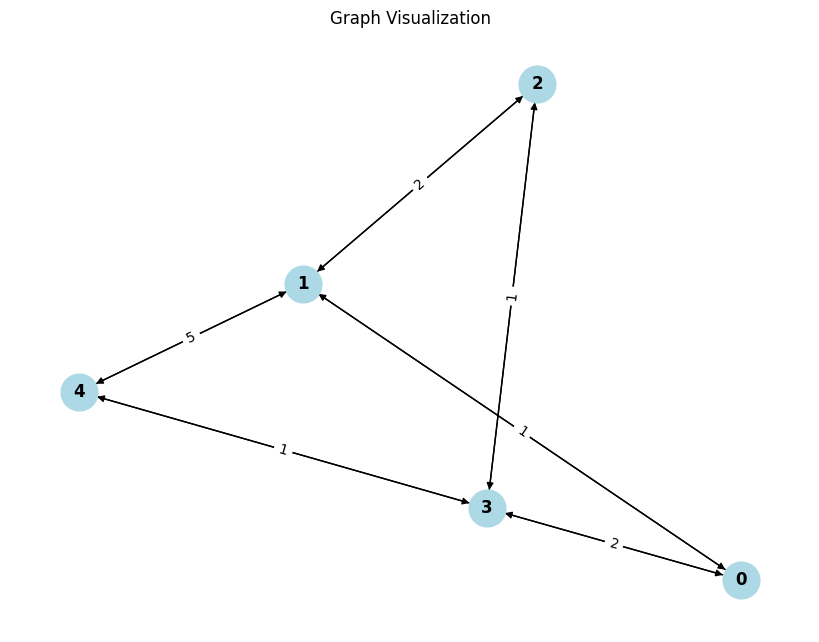

In [7]:
G2 = newgraph()
for e in [(0,1,1),(0,3,2),(1,2,2),(1,4,5),(2,3,1),(3,4,1)]:
    addedge(G2,e)

print("diameter:              ", diameter(G2))
# for i in nodes(G1):
#     d,p,T=dijkstra(G1,i)
#     print("i: ", i)
#     print("distance from root:    ", d)
#     print("rooted tree structure: ", p)
plot_graph(G2)

diameter:               (8, [[0, 2, 1, 3], [3, 1, 2, 0]])


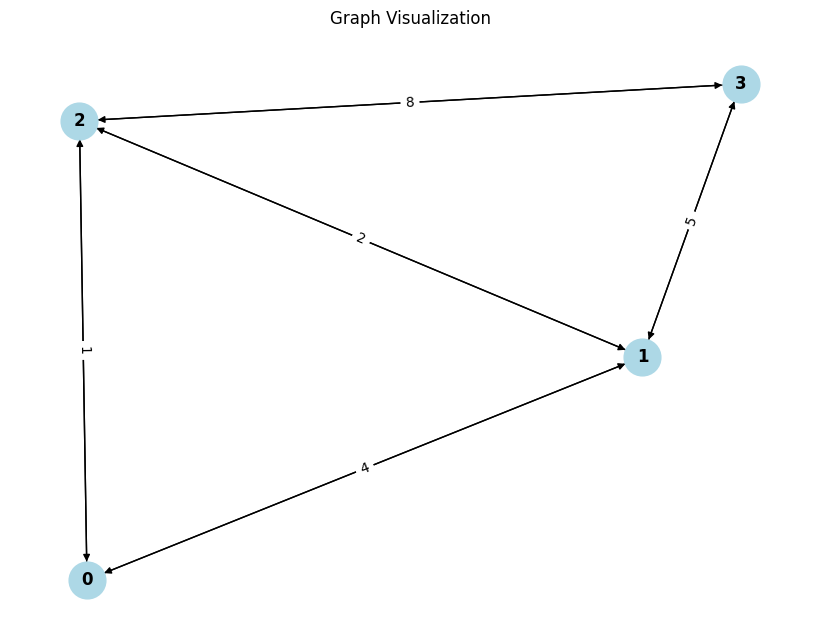

In [8]:
G3 = newgraph()
for e in [(0, 1, 4), (0, 2, 1), (1, 2, 2), (1, 3, 5), (2, 3, 8)]:
    addedge(G3, e)
print("diameter:              ", diameter(G3))
# for i in nodes(G2):
#     d,p,T=dijkstra(G2,i)
#     print("i: ", i)
#     print("distance from root:    ", d)
#     print("rooted tree structure: ", p)
plot_graph(G3)

diameter:               (14, [[1, 9, 8, 6], [6, 3, 2, 1]])


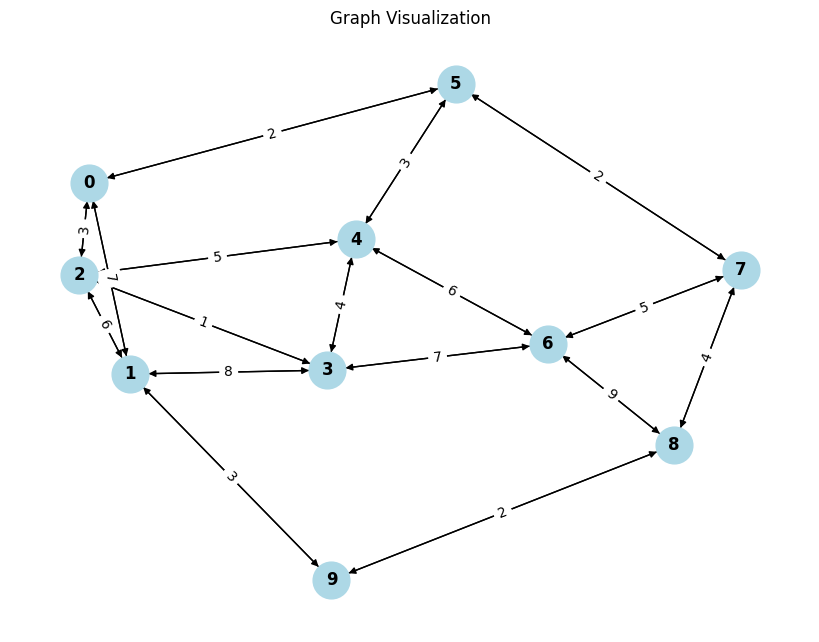

In [9]:
G4 = newgraph()
for e in [
    (0, 1, 7), (0, 2, 3), (0, 5, 2), (1, 2, 6), (1, 3, 8),
    (2, 3, 1), (2, 4, 5), (3, 4, 4), (3, 6, 7), (4, 5, 3),
    (4, 6, 6), (5, 7, 2), (6, 7, 5), (6, 8, 9), (7, 8, 4),
    (8, 9, 2), (1, 9, 3)
]:
    addedge(G4, e)

# [0, 5, 7, 8, 9] has weight 10 as well

print("diameter:              ", diameter(G4))
# for i in nodes(G3):
#     d,p,T=dijkstra(G3,i)
#     print("i: ", i)
#     print("distance from root:    ", d)
#     print("rooted tree structure: ", p)

plot_graph(G4)

In [10]:
G0 = newgraph()
for e in []:
    addedge(G0,e)
print("diameter:              ", diameter(G0))

diameter:               (0, [])


In [11]:
G1 = newgraph()
for e in [(0,1,1)]:
    addedge(G1,e)
print("diameter:              ", diameter(G1))

diameter:               (1, [[0, 1], [1, 0]])


## Proof of Correctness

dijkstra is proved to find the shortest paths from a root node, so finding the shortest path for all nodes by performing dijkstra on all nodes and taking the maximum is the definition of diameter. 

## Runtime

dijkstra's runtime is $O( (|E| + |V|)*log|V| )$ since we are using a min-heap for distances. The code is broken into 2 parts, finding the diameter and finding all the paths with that diameter. In order to find the diameter, we perform dijkstra's algorithm on every node so $O( (|E| + |V|)*|V|*log|V| )$ . The second portion finds all the paths by performing dijkstra again on every node and and only adding paths with size of diameter. The runtime to add the paths is dependant on how many paths there are but it can't be worse every node and every edge which is smaller than dijkstra's algorithm. 
    
    # find diameter
    O(|V|)
        O( (|E| + |V|)*log|V| )

    # find paths with that diameter
    O(|V|)
        O( (|E| + |V|)*log|V| )
        can't be worse than O( (|E| + |V|)*log|V| ) because it is a portion of the tree made from dijkstra


$$ 1 + 1 + \sum_{i=1}^{V}( |E| + |V|)*log|V| + 1 + 1)+ \sum_{i=1}^{V}( |E| + |V|)*log|V| + 1 + \sum_{i=1}^{V}1 + |E| + |V|)$$
$$ 2 + \sum_{i=1}^{V}( |E| + |V|)*log|V| + 2)+ \sum_{i=1}^{V}( |E| + |V|)*log|V| + 1 + |V| + |E| + |V|)$$
$$ 2 + 2|V| + (|E| + |V|)*|V|*log|V|)+ \sum_{i=1}^{V}( |E| + |V|)*log|V| + 1 + 2|V| + |E|)$$
...
$$O( (|E| + |V|)*|V|*log|V| )$$




